In [1]:
#第3次训练，根据Step2的训练结果，更新标签

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data
import atecml.fs

from contextlib import contextmanager
from tqdm import tqdm
from time import strftime,time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
from concurrent.futures import ProcessPoolExecutor

plt.style.use('ggplot')

In [3]:
train_df,test_df= atecml.data.load()
predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]
target ='Fraud'

predictors.append('NaN_LIST')

In [4]:
#未标记前欺诈交易数据条数
len(train_df[train_df['Fraud'] ==1])

12122

# 分析Reject_inf矩阵分布，并将可疑交易标记为Fraud

In [5]:
reject_df = pd.read_pickle('./reject_inf.dat')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2f6ff5550>]],
      dtype=object)

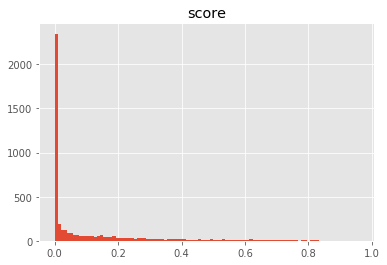

In [6]:
reject_df.hist(bins=100)

1494


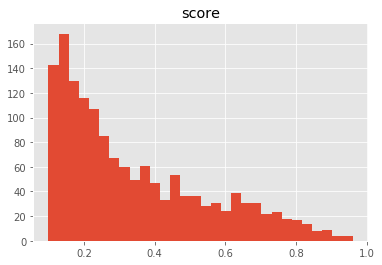

In [7]:
threshold = 0.1 # 大概未知交易中有20%是欺诈交易

filter_list = reject_df[reject_df.score > threshold]
filter_list.hist(bins=30)
reject_bad_list = list(filter_list['id'])
print(len(reject_bad_list))

In [8]:
train_df.loc[train_df['id'].isin(reject_bad_list),'Fraud'] = 1

In [9]:
#新的欺诈交易数量
len(train_df[train_df['Fraud'] ==1])

13616

In [10]:
#继续修正F5

train_df['f5'] =train_df['f5']//100
test_df['f5'] =test_df['f5']//100
a = train_df['f5'].unique()
test_df['f5'][~test_df['f5'].isin(a)] =np.nan

# 计算每个Feature的WOE/IV

In [11]:
iv_list = {}
woe_table = {}
type_list = {}

def mt_iv(feature):
    return atecml.data.calc_iv(df=train_df,feature=feature,target=target,category_num=64)

with ProcessPoolExecutor(max_workers=40) as pool:
    for pool_result in pool.map(mt_iv,predictors):
        iv = pool_result[0]
        woe_df = pool_result[1]
        feature_type = pool_result[2]
        iv_list.update(iv)
        woe_table.update(woe_df)
        type_list.update(feature_type)

[2018-07-02 16:10:12][WoE/IV Calculation for f1] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f2] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f3] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f5] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f4] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f6] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f8] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f7] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f9] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f12] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f13] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f10] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f11] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f14] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f16] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f15] Begin ...
[2018-07-02 16:10:12][WoE/IV Calculation for f17]

[2018-07-02 16:11:27][WoE/IV Calculation for f83] Begin ...
[2018-07-02 16:11:29][WoE/IV Calculation for f45] End   ...[Elapsed: 34.61s]
[2018-07-02 16:11:29][WoE/IV Calculation for f84] Begin ...
[2018-07-02 16:11:30][WoE/IV Calculation for f42] End   ...[Elapsed: 39.37s]
[2018-07-02 16:11:30][WoE/IV Calculation for f85] Begin ...
[2018-07-02 16:11:31][WoE/IV Calculation for f47] End   ...[Elapsed: 36.27s]
[2018-07-02 16:11:31][WoE/IV Calculation for f86] Begin ...
[2018-07-02 16:11:32][WoE/IV Calculation for f44] End   ...[Elapsed: 39.55s]
[2018-07-02 16:11:32][WoE/IV Calculation for f87] Begin ...
[2018-07-02 16:11:36][WoE/IV Calculation for f64] End   ...[Elapsed: 34.97s]
[2018-07-02 16:11:36][WoE/IV Calculation for f88] Begin ...
[2018-07-02 16:11:36][WoE/IV Calculation for f55] End   ...[Elapsed: 38.73s]
[2018-07-02 16:11:36][WoE/IV Calculation for f89] Begin ...
[2018-07-02 16:11:37][WoE/IV Calculation for f54] End   ...[Elapsed: 39.67s]
[2018-07-02 16:11:37][WoE/IV Calculation 

[2018-07-02 16:12:33][WoE/IV Calculation for f143] Begin ...
[2018-07-02 16:12:34][WoE/IV Calculation for f106] End   ...[Elapsed: 45.23s]
[2018-07-02 16:12:34][WoE/IV Calculation for f144] Begin ...
[2018-07-02 16:12:35][WoE/IV Calculation for f108] End   ...[Elapsed: 44.75s]
[2018-07-02 16:12:35][WoE/IV Calculation for f145] Begin ...
[2018-07-02 16:12:37][WoE/IV Calculation for f104] End   ...[Elapsed: 48.04s]
[2018-07-02 16:12:37][WoE/IV Calculation for f146] Begin ...
[2018-07-02 16:12:38][WoE/IV Calculation for f114] End   ...[Elapsed: 39.79s]
[2018-07-02 16:12:38][WoE/IV Calculation for f147] Begin ...
[2018-07-02 16:12:38][WoE/IV Calculation for f99] End   ...[Elapsed: 56.32s]
[2018-07-02 16:12:38][WoE/IV Calculation for f148] Begin ...
[2018-07-02 16:12:39][WoE/IV Calculation for f116] End   ...[Elapsed: 38.11s]
[2018-07-02 16:12:39][WoE/IV Calculation for f149] Begin ...
[2018-07-02 16:12:40][WoE/IV Calculation for f113] End   ...[Elapsed: 42.18s]
[2018-07-02 16:12:40][WoE/IV

[2018-07-02 16:13:47][WoE/IV Calculation for f202] Begin ...
[2018-07-02 16:13:49][WoE/IV Calculation for f167] End   ...[Elapsed: 37.69s]
[2018-07-02 16:13:49][WoE/IV Calculation for f203] Begin ...
[2018-07-02 16:13:50][WoE/IV Calculation for f166] End   ...[Elapsed: 38.53s]
[2018-07-02 16:13:50][WoE/IV Calculation for f204] Begin ...
[2018-07-02 16:13:52][WoE/IV Calculation for f168] End   ...[Elapsed: 38.99s]
[2018-07-02 16:13:52][WoE/IV Calculation for f205] Begin ...
[2018-07-02 16:13:53][WoE/IV Calculation for f132] End   ...[Elapsed: 85.30s]
[2018-07-02 16:13:53][WoE/IV Calculation for f206] Begin ...
[2018-07-02 16:13:54][WoE/IV Calculation for f169] End   ...[Elapsed: 38.36s]
[2018-07-02 16:13:54][WoE/IV Calculation for f207] Begin ...
[2018-07-02 16:13:55][WoE/IV Calculation for f165] End   ...[Elapsed: 43.65s]
[2018-07-02 16:13:55][WoE/IV Calculation for f208] Begin ...
[2018-07-02 16:13:55][WoE/IV Calculation for f131] End   ...[Elapsed: 88.59s]
[2018-07-02 16:13:55][WoE/I

[2018-07-02 16:14:49][WoE/IV Calculation for f261] Begin ...
[2018-07-02 16:14:50][WoE/IV Calculation for f229] End   ...[Elapsed: 36.40s]
[2018-07-02 16:14:50][WoE/IV Calculation for f262] Begin ...
[2018-07-02 16:14:52][WoE/IV Calculation for f232] End   ...[Elapsed: 36.68s]
[2018-07-02 16:14:52][WoE/IV Calculation for f263] Begin ...
[2018-07-02 16:14:52][WoE/IV Calculation for f226] End   ...[Elapsed: 39.93s]
[2018-07-02 16:14:52][WoE/IV Calculation for f264] Begin ...
[2018-07-02 16:14:52][WoE/IV Calculation for f228] End   ...[Elapsed: 39.10s]
[2018-07-02 16:14:52][WoE/IV Calculation for f265] Begin ...
[2018-07-02 16:14:55][WoE/IV Calculation for f218] End   ...[Elapsed: 50.25s]
[2018-07-02 16:14:55][WoE/IV Calculation for f266] Begin ...
[2018-07-02 16:14:56][WoE/IV Calculation for f233] End   ...[Elapsed: 39.84s]
[2018-07-02 16:14:56][WoE/IV Calculation for f267] Begin ...
[2018-07-02 16:14:56][WoE/IV Calculation for f240] End   ...[Elapsed: 35.60s]
[2018-07-02 16:14:56][WoE/I

[2018-07-02 16:16:03][WoE/IV Calculation for NaN_LIST] End   ...[Elapsed: 35.78s]


# 使用WOE/IV结果对原有训练集特征纬度提升

In [12]:
def mt_conv_train(feature):
    return atecml.data.woe_convert(df=train_df,feature=feature,woe_table=woe_table,type_list=type_list,category_num=64)

new_feature =[]
with ProcessPoolExecutor(max_workers=60) as pool:
    for pool_result in pool.map(mt_conv_train,predictors):
        new_feature.append(pool_result)
        
_t_new_df = pd.concat(new_feature,axis=1)

mean = _t_new_df.mean(axis=1)
variance = _t_new_df.var(axis=1)
skew = _t_new_df.skew(axis=1)
_t_new_df['mean'] = mean
_t_new_df['variance'] = variance
_t_new_df['skew'] = skew

rename_dict ={}
for idx in range(1,298):
    old_feature_name = 'f' + str(idx)
    new_feature_name = 'n' + str(idx)
    rename_dict[old_feature_name] = new_feature_name
rename_dict['NaN_LIST'] = 'n298'
_t_new_df.rename(columns=rename_dict,inplace=True)

ext_df = pd.concat([train_df,_t_new_df],axis=1)
ext_df.to_pickle('./train_new.dat')

In [13]:
test_df = atecml.data.load_test()
test_df['f5'] =test_df['f5']//100
test_df['f5'][~test_df['f5'].isin(a)] =np.nan

def mt_conv_test(feature):
    return atecml.data.woe_convert(df=test_df,feature=feature,woe_table=woe_table,type_list=type_list,category_num=64)

new_feature_tt =[]
with ProcessPoolExecutor(max_workers=60) as pool:
    for pool_result in pool.map(mt_conv_test,predictors):
        new_feature_tt.append(pool_result)
        
_t_new_tt_df = pd.concat(new_feature_tt,axis=1)
mean = _t_new_tt_df.mean(axis=1)
variance = _t_new_tt_df.var(axis=1)
skew = _t_new_tt_df.skew(axis=1)
_t_new_tt_df['mean'] = mean
_t_new_tt_df['variance'] = variance
_t_new_tt_df['skew'] = skew

_t_new_tt_df.rename(columns=rename_dict,inplace=True)
ext_tt_df = pd.concat([test_df,_t_new_tt_df],axis=1)
ext_tt_df.to_pickle('./test_new.dat')

# 特征IV分析

In [14]:
iv_df = pd.DataFrame()
iv_df['IV'] = pd.DataFrame.from_dict(iv_list,orient='index')[0]
iv_df['Type'] = pd.DataFrame.from_dict(type_list,orient='index')[0]
iv_df.sort_values('IV',ascending=False).head(100)

,IV,Type
f31,2.230296,category
f30,2.203855,category
f259,2.052644,value
f29,2.006701,category
f28,1.998555,category
f261,1.932341,value
f260,1.928743,value
f264,1.913461,value
f271,1.906349,value
f270,1.848054,value


In [2]:
iv_df

NameError: name 'iv_df' is not defined